In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.regularizers import Regularizer

import tensorflow.keras.utils as ku 
import numpy as np 

In [0]:
tokenizer = Tokenizer()

import urllib.request

url = "https://raw.githubusercontent.com/ishantjuyal/Word-Prediction/master/Data/Taylor_Swift.txt"
data = urllib.request.urlopen(url).read().decode("utf-8")

In [0]:
corpus = data.lower().split("\r\n")

corpus = list(set(corpus))

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [49]:
label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
model = Sequential()
model.add(Embedding(total_words, 50, input_length=max_sequence_len-1))  #(# Your Embedding Layer)
model.add(Bidirectional(LSTM(150, return_sequences=True)))  #(# An LSTM Layer)
model.add(Dropout(0.2))  #(# A dropout layer)
model.add(LSTM(100))  #(# Another LSTM Layer)
model.add(Dense(total_words/2, activation='relu'))  #(# A Dense Layer including regularizers)
model.add(Dense(total_words, activation='softmax'))  #(# A Dense Layer)
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')  #(# Pick a loss function and an optimizer)
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 17, 50)            120450    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 17, 300)           241200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 17, 300)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_2 (Dense)              (None, 1204)              121604    
_________________________________________________________________
dense_3 (Dense)              (None, 2409)              2902845   
Total params: 3,546,499
Trainable params: 3,546,499
Non-trainable params: 0
____________________________________________

In [0]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/50
637/637 [==============================] - 70s 110ms/step - loss: 6.1309 - accuracy: 0.0466
Epoch 2/50
637/637 [==============================] - 70s 110ms/step - loss: 5.6952 - accuracy: 0.0550
Epoch 3/50
637/637 [==============================] - 70s 110ms/step - loss: 5.4061 - accuracy: 0.0680
Epoch 4/50
637/637 [==============================] - 70s 110ms/step - loss: 5.1630 - accuracy: 0.0867
Epoch 5/50
637/637 [==============================] - 70s 110ms/step - loss: 4.9639 - accuracy: 0.1015
Epoch 6/50
637/637 [==============================] - 70s 110ms/step - loss: 4.7856 - accuracy: 0.1179
Epoch 7/50
637/637 [==============================] - 70s 111ms/step - loss: 4.6188 - accuracy: 0.1358
Epoch 8/50
637/637 [==============================] - 77s 120ms/step - loss: 4.4682 - accuracy: 0.1467
Epoch 9/50
637/637 [==============================] - 71s 112ms/step - loss: 4.3187 - accuracy: 0.1568
Epoch 10/50
637/637 [==============================] - 70s 110ms/step - l

In [0]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
import matplotlib.pyplot as plt

def plot_graph(history,string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

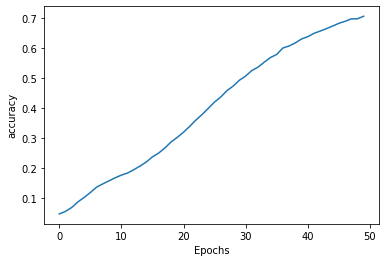

In [0]:
plot_graph(history,'accuracy')

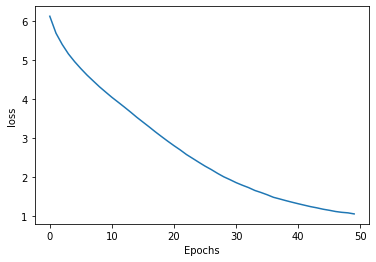

In [0]:
plot_graph(history,'loss')

In [0]:
seed_text = "What you made"
next_words = 6
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

What you made me play yeah i'm your daisy


In [0]:
def make_lyrics(seed_text, next_words):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict_classes(token_list, verbose=0)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    print(seed_text)

In [52]:
make_lyrics("Do you", 5)

Do you remember we were sitting there


In [55]:
make_lyrics("He said", 5)

He said he'd be here by now


In [56]:
make_lyrics("Think of my", 4)

Think of my mind forgets to remind


In [57]:
make_lyrics("Cold", 6)

Cold would you wanna make our love


In [59]:
make_lyrics("A letter", 4)

A letter that you didn't mean


In [61]:
make_lyrics("I'll be", 7)

I'll be usin' for the rest of my life


In [62]:
make_lyrics("Honey", 5)

Honey life is just a classroom


In [64]:
make_lyrics("The water", 7)

The water filled my lungs i screamed so loud


In [68]:
make_lyrics("Make you", 3)

Make you tore it all


In [72]:
make_lyrics("Look at you", 5)

Look at you worrying too much about things
